# Adrian-Nichita Zloteanu
Advanced Big Data and Data Mining  
Data Visualization, Data Preprocessing, and Statistical Analysis Using Python

1. Load the Dataset

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('superstore.csv', encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,NaN,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Data Vizualization

### Total Sales by Category - bar chart

/var/folders/6b/mkrflm9150qd0xn0m2ny51wm0000gn/T/ipykernel_38546/1183269130.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette='viridis')


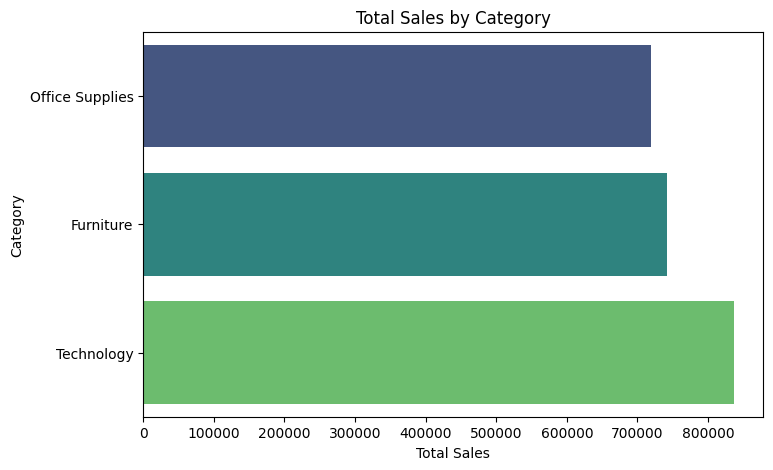

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
category_sales = df.groupby('Category')['Sales'].sum().sort_values()
sns.barplot(x=category_sales.values, y=category_sales.index, palette='viridis')
plt.title('Total Sales by Category')
plt.xlabel('Total Sales')
plt.ylabel('Category')
plt.show()

The above bar chart shows that sales are pretty evenly distributed per category, with Technology having a slight lead.

### Sales by order Date - Line Chart

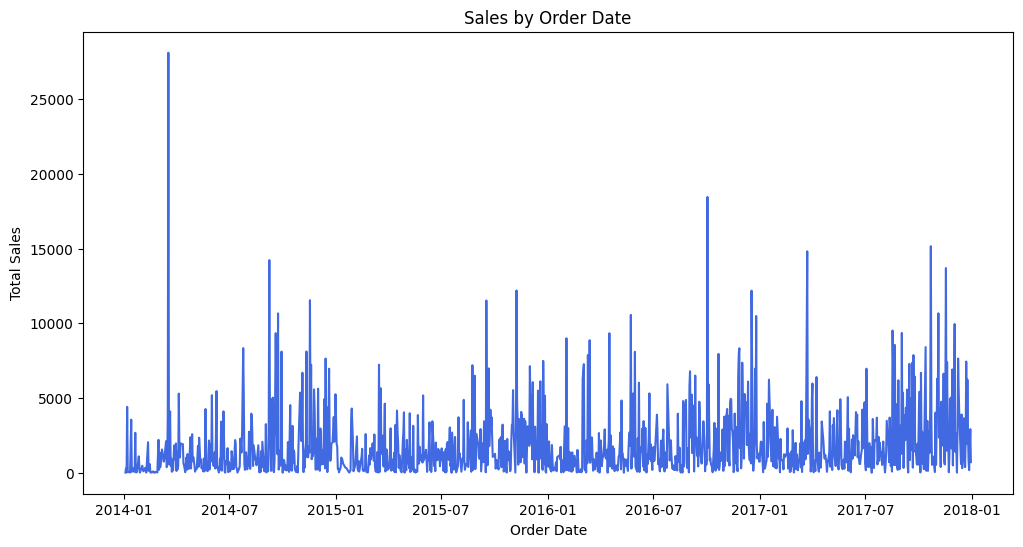

In [9]:
daily_sales = df.groupby('Order Date')['Sales'].sum().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, color='royalblue')
plt.title('Sales by Order Date')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.show()

The line chart above displays the trend of total sales over time. It helps identify periods of high and low sales, and also reveals unusual spikes in the dataset.

## Data Preprocessing

### Reporting Missing Values
For the purposes of this exercise, I removed some values from the superstore.csv file. The below report shows the missing values.

In [23]:
# Detect and report missing values.
df_missing = df.isnull().sum()
print('Missing values per column:')
print(df_missing)

Missing values per column:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        2
Customer ID      4
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


### Handling Missing Values - Backward Fill

In [24]:
# fill missing values using backward fill
df_filled = df.copy().bfill()
# drop rows with more than 2 missing values
df_filled = df_filled.dropna(thresh=len(df_filled.columns)-2)
df_filled.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Outlier Detection and Removal (IQR)

In [25]:
# Calculate IQR and identify outliers in 'Sales'
Q1 = df_filled['Sales'].quantile(0.25)
Q3 = df_filled['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'IQR: {IQR}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')
outliers = df_filled[(df_filled['Sales'] < lower_bound) | (df_filled['Sales'] > upper_bound)]
print('Number of outliers:', len(outliers))
outliers[['Sales']].head()

# Remove outliers from 'Sales'
df_no_outliers = df_filled[(df_filled['Sales'] >= lower_bound) & (df_filled['Sales'] <= upper_bound)]
df_no_outliers.head()

IQR: 192.66, Lower Bound: -271.71000000000004, Upper Bound: 498.93
Number of outliers: 1167


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
5,6,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694
6,7,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656


### Data Reduction
We will sample 10% of the data and drop a lot of columns considered less relevant.

In [21]:
# Sample 10% of the data and drop columns
df_reduced = df_no_outliers.sample(frac=0.1, random_state=42)
df_reduced = df_reduced.drop([
    'Postal Code', 'Product Name', 'Sub-Category', 'Region', 'State', 'City', 'Country', 'Segment'
], axis=1, errors='ignore')
df_reduced.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Product ID,Category,Sales,Quantity,Discount,Profit
1152,1153,CA-2017-160395,2016-12-31,1/6/2017,Standard Class,KL-16555,Kelly Lampkin,OFF-AR-10003759,Office Supplies,3.640,2,0.0,1.6380
9016,9017,CA-2016-131639,2016-12-17,12/23/2016,Standard Class,NS-18640,Noel Staavos,OFF-BI-10000948,Office Supplies,11.416,1,0.2,3.8529
6910,6911,US-2017-115301,2017-07-29,8/2/2017,Standard Class,VG-21790,Vivek Gonzalez,FUR-BO-10004709,Furniture,115.960,2,0.0,25.5112
7043,7044,US-2017-165358,2017-07-18,7/23/2017,Standard Class,SV-20365,Seth Vernon,FUR-CH-10002647,Furniture,198.744,4,0.3,-14.1960
7512,7513,US-2017-161935,2017-07-14,7/18/2017,Standard Class,JL-15835,John Lee,OFF-ST-10001837,Office Supplies,239.456,7,0.2,17.9592


### Data Scaling and Discretization
Here I apply min-max scaling to the 'Sales' column and discretize profit into low, medium or high

In [22]:
# Min-Max scaling for 'Sales' (manual, no external libraries)
sales_min = df_reduced['Sales'].min()
sales_max = df_reduced['Sales'].max()
df_reduced['Sales_Scaled'] = (df_reduced['Sales'] - sales_min) / (sales_max - sales_min)

# Z-score standardization for 'Profit' (manual, no external libraries)
profit_mean = df_reduced['Profit'].mean()
profit_std = df_reduced['Profit'].std()
df_reduced['Profit_Zscore'] = (df_reduced['Profit'] - profit_mean) / profit_std

# Discretize 'Profit' into 3 bins (Low, Medium, High) using quantiles
profit_bins = [-np.inf, df_reduced['Profit'].quantile(0.33), df_reduced['Profit'].quantile(0.66), np.inf]
profit_labels = ['Low', 'Medium', 'High']
df_reduced['Profit_Category'] = pd.cut(df_reduced['Profit'], bins=profit_bins, labels=profit_labels)
df_reduced.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Product ID,Category,Sales,Quantity,Discount,Profit,Sales_Scaled,Profit_Zscore,Profit_Category
1152,1153,CA-2017-160395,2016-12-31,1/6/2017,Standard Class,KL-16555,Kelly Lampkin,OFF-AR-10003759,Office Supplies,3.640,2,0.0,1.6380,0.005336,-0.233706,Low
9016,9017,CA-2016-131639,2016-12-17,12/23/2016,Standard Class,NS-18640,Noel Staavos,OFF-BI-10000948,Office Supplies,11.416,1,0.2,3.8529,0.020994,-0.182843,Medium
6910,6911,US-2017-115301,2017-07-29,8/2/2017,Standard Class,VG-21790,Vivek Gonzalez,FUR-BO-10004709,Furniture,115.960,2,0.0,25.5112,0.231505,0.314528,High
7043,7044,US-2017-165358,2017-07-18,7/23/2017,Standard Class,SV-20365,Seth Vernon,FUR-CH-10002647,Furniture,198.744,4,0.3,-14.1960,0.398200,-0.597325,Low
7512,7513,US-2017-161935,2017-07-14,7/18/2017,Standard Class,JL-15835,John Lee,OFF-ST-10001837,Office Supplies,239.456,7,0.2,17.9592,0.480178,0.141101,High


## Statistical Analysis

### General Overview of Data

In [9]:
print('DataFrame info:')
df.info()
print('\nDataFrame describe:')
display(df.describe(include='all'))

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9992 non-null   object        
 5   Customer ID    9990 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-C

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994,9992,9990,9994,9994,9994,9994,...,9994.000000,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,NaN,1334,4,793,793,3,1,531,...,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,NaN,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,NaN,35,5967,37,37,5191,9994,915,...,NaN,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,2016-04-30 00:07:12.259355648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55190.379428,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
min,1.000000,NaN,2014-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,2015-05-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23223.000000,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,NaN,2016-06-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56430.500000,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,NaN,2017-05-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90008.000000,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000
max,9994.000000,NaN,2017-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99301.000000,NaN,NaN,NaN,NaN,NaN,22638.480000,14.000000,0.800000,8399.976000


### Central Tendency Measures

In [11]:
# Here we calculate minimum, maximum, mean, median, and mode for numeric columns
min_vals = df.min(numeric_only=True)
max_vals = df.max(numeric_only=True)
mean_vals = df.mean(numeric_only=True)
median_vals = df.median(numeric_only=True)
mode_vals = df.mode(numeric_only=True).iloc[0]

print('Minimum values:\n', min_vals)
print('Maximum values:\n', max_vals)
print('Mean values:\n', mean_vals)
print('Median values:\n', median_vals)
print('Mode values:\n', mode_vals)

Minimum values:
 Row ID            1.000
Postal Code    1040.000
Sales             0.444
Quantity          1.000
Discount          0.000
Profit        -6599.978
dtype: float64
Maximum values:
 Row ID          9994.000
Postal Code    99301.000
Sales          22638.480
Quantity          14.000
Discount           0.800
Profit          8399.976
dtype: float64
Mean values:
 Row ID          4997.500000
Postal Code    55190.379428
Sales            229.858001
Quantity           3.789574
Discount           0.156203
Profit            28.656896
dtype: float64
Median values:
 Row ID          4997.5000
Postal Code    56430.5000
Sales             54.4900
Quantity           3.0000
Discount           0.2000
Profit             8.6665
dtype: float64
Mode values:
 Row ID             1.00
Postal Code    10035.00
Sales             12.96
Quantity           3.00
Discount           0.00
Profit             0.00
Name: 0, dtype: float64


### Dispersion Measures

In [26]:
range_vals = max_vals - min_vals
q1 = df.quantile(0.25, numeric_only=True)
q3 = df.quantile(0.75, numeric_only=True)
iqr = q3 - q1
var_vals = df.var(numeric_only=True)
std_vals = df.std(numeric_only=True)

print('Range:\n', range_vals)
print('Q1:\n', q1)
print('Q3:\n', q3)
print('IQR:\n', iqr)
print('Variance:\n', var_vals)
print('Standard Deviation:\n', std_vals)

Range:
 Row ID          9993.000
Postal Code    98261.000
Sales          22638.036
Quantity          13.000
Discount           0.800
Profit         14999.954
dtype: float64
Q1:
 Row ID          2499.25000
Postal Code    23223.00000
Sales             17.28000
Quantity           2.00000
Discount           0.00000
Profit             1.72875
Name: 0.25, dtype: float64
Q3:
 Row ID          7495.750
Postal Code    90008.000
Sales            209.940
Quantity           5.000
Discount           0.200
Profit            29.364
Name: 0.75, dtype: float64
IQR:
 Row ID          4996.50000
Postal Code    66785.00000
Sales            192.66000
Quantity           3.00000
Discount           0.20000
Profit            27.63525
dtype: float64
Variance:
 Row ID         8.324169e+06
Postal Code    1.028080e+09
Sales          3.884345e+05
Quantity       4.951113e+00
Discount       4.262242e-02
Profit         5.487780e+04
dtype: float64
Standard Deviation:
 Row ID          2885.163629
Postal Code    32063.6933

### Correlation Analysis

In [12]:
analysis = df.corr(numeric_only=True)
display(analysis)

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.009671,-0.001359,-0.004016,0.013480,0.012497
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.001359,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,-0.004016,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.013480,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,0.012497,-0.029961,0.479064,0.066253,-0.219487,1.000000
